In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences 
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import SimpleRNN,Dense,Activation

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
(X_train,Y_train),(X_test,Y_test) = imdb.load_data(path="imdb.npz",num_words=None,skip_top=0,maxlen=None,start_char=1,seed=13,oov_char=2,index_from=3)

17465344/17464789 [==============================] - 0s 0us/step


In [3]:
print("Type: ", type(X_train))
print("Type: ", type(Y_train))

Type:  <class 'numpy.ndarray'>
Type:  <class 'numpy.ndarray'>


In [4]:
print("X train shape: ",X_train.shape)
print("Y train shape: ",Y_train.shape)

X train shape:  (25000,)
Y train shape:  (25000,)


## Exploratory Data Analysis(EDA)

In [5]:
print("Y train values: ",np.unique(Y_train))
print("Y test values: ",np.unique(Y_test))

Y train values:  [0 1]
Y test values:  [0 1]


In [6]:
unique,counts = np.unique(Y_train,return_counts=True)
print("Y train distribution: ", dict(zip(unique,counts)))

Y train distribution:  {0: 12500, 1: 12500}


In [7]:
unique,counts = np.unique(Y_test,return_counts=True)
print("Y test distribution: ", dict(zip(unique,counts)))

Y test distribution:  {0: 12500, 1: 12500}


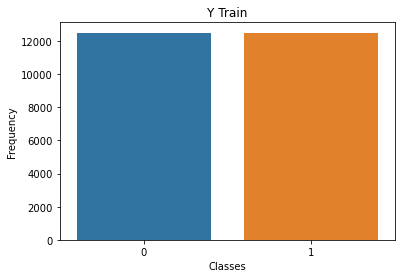

In [8]:
plt.figure();
sns.countplot(Y_train);
plt.xlabel("Classes");
plt.ylabel("Frequency");
plt.title("Y Train");

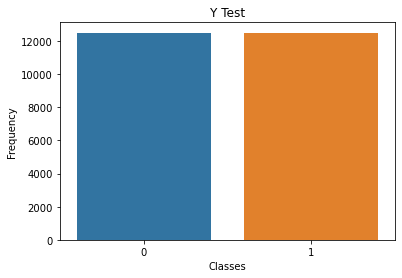

In [9]:
plt.figure();
sns.countplot(Y_test);
plt.xlabel("Classes");
plt.ylabel("Frequency");
plt.title("Y Test");

In [10]:
print(X_train[0])

[1, 608, 13, 6467, 14, 22, 13, 80, 1109, 14, 20, 584, 18, 231, 72, 141, 6, 783, 254, 189, 7060, 13, 100, 115, 106, 14, 20, 584, 207, 82, 557, 111, 111, 537, 7, 4, 962, 12, 69, 11, 45, 204, 766, 33, 4, 8334, 23, 94, 797, 1048, 991, 527, 1987, 538, 2629, 4, 4518, 125, 72, 449, 8295, 68, 3385, 2500, 93, 14, 1190, 22, 13, 119, 12, 13, 197, 4, 226, 22, 16, 542, 5, 221, 14, 20, 9, 38, 629, 14, 9, 4, 6128, 20, 13, 28, 126, 110, 11, 61, 113, 24, 15, 51, 571, 11, 4, 22, 5, 4, 326, 7, 4, 22, 26, 24, 629, 195, 21, 51, 210, 188, 72, 16, 21849, 2726, 116, 118, 189, 22, 126, 164, 70, 126, 30, 14, 629, 174, 2195, 829, 33, 94, 61124]


In [11]:
review_len_train = []
review_len_test = []
for i,j in zip(X_train,X_test):
    review_len_train.append(len(i))
    review_len_test.append(len(j))

In [12]:
print("min: ", min(review_len_train), "max: ", max(review_len_train))

min:  11 max:  2494


In [13]:
print("min: ", min(review_len_test), "max: ", max(review_len_test))

min:  7 max:  2315


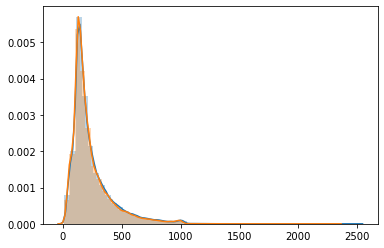

In [14]:
sns.distplot(review_len_train,hist_kws={"alpha":0.3});
sns.distplot(review_len_test,hist_kws={"alpha":0.3});

In [15]:
print("Train mean: ",np.mean(review_len_train))
print("Train median: ",np.median(review_len_train))
print("Train mode: ",stats.mode(review_len_train))

Train mean:  238.71364
Train median:  178.0
Train mode:  ModeResult(mode=array([132]), count=array([196]))


In [16]:
# number or words
word_index = imdb.get_word_index()
print(type(word_index))

1646592/1641221 [==============================] - 0s 0us/step
<class 'dict'>


In [17]:
print("length of word_index: ",len(word_index))

length of word_index:  88584


In [18]:
for keys,values in word_index.items():
    if values == 1:
        print(keys)

the


In [19]:
def whatItSay(index=24):
    reverse_index = dict([(value,key) for (key,value) in word_index.items()])
    decode_review = " ".join([reverse_index.get(i-3, "!") for i in X_train[index]])
    print(decode_review)
    print(Y_train[index])
    return decode_review

decoded_review = whatItSay()

! this movie was extremely funny i would like to own this for my vintage collection of 1970s movie must see again list i know this cast of characters they are people that i have met over the years and that prompt me to search out this comedy unfortunately this was never put to dvd or vhs redd foxx always a clown of comedy pearl baily a great match as his wife witty and sassy norman a son with a secret not sure if he will have a future if it is out dennis dugan crazy funny man miss dobson hooker with a heart and little conscience love lust strange family ties this movie qualifies for a come back encore performance situation comedy with a mix of events as this could and should find its way as a remake i do think finding cast would be extremely difficult maybe impossible except jerry seinfeld playing dennis dugan role this earmarks a couple of seinfeld episodes that also brought me back to norman is that you keeping them in the closest was surely impossible as impossible to reform pretend

In [20]:
decoded_review = whatItSay(5)

! quite possibly how francis veber one of the best comedy directors in the world at least when sticking to his native france managed to turn in a film so completely unwatchable is beyond the reason of mere mortal man to discern it's not just that the characters are so unlikeable or that the film is so utterly devoid of even the lowest form of wit it's genuinely physically painful to watch such an endless parade of inept writing acting and film making that you cannot believe this is the work of experienced and talented filmmakers for once the near eternity spent in the cutting room and on the shelf before its blink and you'll miss it theatrical release tells the whole story what were they thinking
0


## Preprocess

In [21]:
num_words = 15000
(X_train,Y_train),(X_test,Y_test) = imdb.load_data(num_words=num_words)

In [22]:
maxlen=130
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [23]:
print("X train shape: ",X_train.shape)

X train shape:  (25000, 130)


In [24]:
print(X_train[5])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    1  778  128   74   12  630  163   15    4 1766 7982
 1051    2   32   85  156   45   40  148  139  121  664  665   10   10
 1361  173    4  749    2   16 3804    8    4  226   65   12   43  127
   24    2   10   10]


In [25]:
for i in X_train[0:10]:
    print(len(i))

130
130
130
130
130
130
130
130
130
130


In [26]:
decoded_review = whatItSay(5)

! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! begins better than it ends funny that the russian submarine crew ! all other actors it's like those scenes where documentary shots br br spoiler part the message ! was contrary to the whole story it just does not ! br br
0


## Construct RNN Model

In [27]:
rnn = Sequential()

rnn.add(Embedding(num_words,32,input_length =len(X_train[0]))) # num_words=15000
rnn.add(SimpleRNN(16,input_shape = (num_words,maxlen), return_sequences=False,activation="relu"))
rnn.add(Dense(1)) #flatten
rnn.add(Activation("sigmoid")) #using sigmoid for binary classification

print(rnn.summary())
rnn.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 130, 32)           480000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 16)                784       
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 480,801
Trainable params: 480,801
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
history = rnn.fit(X_train,Y_train,validation_data = (X_test,Y_test),epochs = 5,batch_size=128,verbose = 1)

Epoch 1/5
196/196 [==============================] - 10s 50ms/step - loss: 0.6520 - accuracy: 0.6322 - val_loss: 0.5588 - val_accuracy: 0.7799
Epoch 2/5
196/196 [==============================] - 9s 48ms/step - loss: 0.4777 - accuracy: 0.7967 - val_loss: 0.4407 - val_accuracy: 0.7997
Epoch 3/5
196/196 [==============================] - 10s 50ms/step - loss: 0.3459 - accuracy: 0.8548 - val_loss: 0.3921 - val_accuracy: 0.8346
Epoch 4/5
196/196 [==============================] - 10s 50ms/step - loss: 0.2680 - accuracy: 0.8928 - val_loss: 0.3208 - val_accuracy: 0.8628
Epoch 5/5
196/196 [==============================] - 9s 46ms/step - loss: 0.2191 - accuracy: 0.9154 - val_loss: 0.3230 - val_accuracy: 0.8642


In [29]:
score = rnn.evaluate(X_test,Y_test)

782/782 [==============================] - 8s 10ms/step - loss: 0.3230 - accuracy: 0.8642


In [32]:
print("accuracy:", score[1]*100)

accuracy: 86.41600012779236


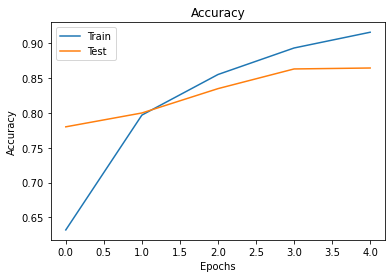

In [35]:
plt.figure()
plt.plot(history.history["accuracy"],label="Train");
plt.plot(history.history["val_accuracy"],label="Test");
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show();

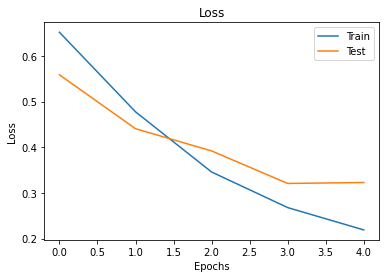

In [37]:
plt.figure()
plt.plot(history.history["loss"],label="Train");
plt.plot(history.history["val_loss"],label="Test");
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show();